<a href="https://colab.research.google.com/github/kumar-sendhi/courseraml/blob/master/SentimentOnTweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
reviews_df = pd.read_csv('sample_data/tweets.csv', names=['sentiment','a','date','query','username','tweet'], encoding = "ISO-8859-1")
print(reviews_df.head())

fiftytweets = reviews_df.head(10000)




   sentiment  ...                                              tweet
0          0  ...  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          0  ...  is upset that he can't update his Facebook by ...
2          0  ...  @Kenichan I dived many times for the ball. Man...
3          0  ...    my whole body feels itchy and like its on fire 
4          0  ...  @nationwideclass no, it's not behaving at all....

[5 rows x 6 columns]


In [ ]:
filtereddf = fiftytweets.drop(columns=['a','date','query','username'])
print(filtereddf.head())

   sentiment                                              tweet
0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          0  is upset that he can't update his Facebook by ...
2          0  @Kenichan I dived many times for the ball. Man...
3          0    my whole body feels itchy and like its on fire 
4          0  @nationwideclass no, it's not behaving at all....


In [ ]:
rev_txt = filtereddf['tweet']
rev_labels = filtereddf['sentiment']

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words = 280, lower=True, oov_token='<UNK>')

tokenizer.fit_on_texts(rev_txt)

word_index = tokenizer.word_index
print(word_index)

{'<UNK>': 1, 'i': 2, 'to': 3, 'the': 4, 'a': 5, 'my': 6, 'and': 7, 'is': 8, 'in': 9, 'it': 10, 'for': 11, 'of': 12, 'you': 13, 'but': 14, 'me': 15, 'on': 16, 'have': 17, 'not': 18, 'so': 19, "i'm": 20, 'that': 21, 'at': 22, 'just': 23, 'this': 24, 'work': 25, 'be': 26, 'was': 27, 'up': 28, 'no': 29, 'now': 30, 'with': 31, 'get': 32, 'out': 33, 'go': 34, 'today': 35, 'all': 36, 'day': 37, 'too': 38, "it's": 39, 'do': 40, 'like': 41, 'going': 42, "don't": 43, 'still': 44, 'got': 45, 'are': 46, "can't": 47, 'back': 48, 'from': 49, 'time': 50, 'am': 51, 'quot': 52, 'really': 53, 'about': 54, 'had': 55, 'what': 56, 'has': 57, 'one': 58, 'good': 59, 'want': 60, 'its': 61, 'im': 62, 'sad': 63, 'sleep': 64, 'why': 65, 'need': 66, 'know': 67, 'some': 68, 'http': 69, 'will': 70, 'night': 71, 'they': 72, 'last': 73, 'home': 74, 'more': 75, 'when': 76, 'miss': 77, '2': 78, 'morning': 79, 'your': 80, 'off': 81, 'oh': 82, 'lol': 83, 'sick': 84, 'sorry': 85, 'feel': 86, 'as': 87, 'think': 88, 'much':

In [ ]:
rev_seq = tokenizer.texts_to_sequences(rev_txt)
print(type(rev_seq))
print(rev_labels)
print(type(rev_labels))

<class 'list'>
0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: sentiment, Length: 10000, dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
import numpy as np
rev_seq_arry = np.array(rev_seq)
print(rev_seq_arry)
print(type(rev_seq_arry))
rev_labels_arry = rev_labels.to_numpy()
print(type(rev_labels_arry))
rev_labels_arry

[list([1, 69, 221, 93, 1, 1, 156, 5, 1, 13, 1, 45, 1, 1, 12, 1, 37, 3, 40, 10, 1])
 list([8, 1, 21, 123, 47, 1, 184, 1, 132, 1, 10, 7, 1, 1, 87, 5, 1, 117, 35, 1, 1])
 list([1, 2, 1, 271, 1, 11, 4, 1, 1, 3, 1, 1, 4, 1, 34, 33, 12, 1]) ...
 list([1, 1, 29, 99, 1, 223, 7, 1, 20, 1, 20, 99, 5, 25, 1])
 list([1, 151, 214, 76, 2, 73, 1, 65, 51, 2, 28, 19, 160, 39, 1, 2, 1, 26, 28, 240, 41, 1])
 list([61, 161, 1, 37])]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
import keras as K

In [ ]:
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(rev_seq_arry, rev_labels_arry, test_size=0.3)

In [ ]:
train_x.shape, test_x.shape
print(train_x)

[list([1, 62, 150, 1, 13, 3, 1, 1, 15, 60, 3, 1, 5, 1, 1, 1, 69, 1, 1, 93, 205, 1, 1, 1])
 list([1, 79, 1, 161, 58, 9, 1, 1, 1, 61, 18, 1, 105, 35, 1, 7, 1])
 list([8, 219, 7, 1, 17, 1, 3, 40]) ...
 list([18, 1, 103, 89, 50, 2, 1, 9, 4, 1, 2, 43, 270, 32, 5, 1, 23, 32, 1, 1])
 list([1, 1, 46, 1, 3, 152, 132])
 list([81, 3, 1, 1, 7, 1, 140, 6, 217, 1])]


#Pre-processing

In [ ]:
max_review_length = 80
train_x = K.preprocessing.sequence.pad_sequences(train_x,truncating='post',padding='post',maxlen=max_review_length)
test_x = K.preprocessing.sequence.pad_sequences(test_x,truncating='post',padding='post',maxlen=max_review_length)
print(type(train_x))
print(train_x[0:5])
print('x_train shape:', train_x.shape)
print('x_test shape:', test_x.shape)
max_words = 20000

<class 'numpy.ndarray'>
[[  1  62 150   1  13   3   1   1  15  60   3   1   5   1   1   1  69   1
    1  93 205   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  1  79   1 161  58   9   1   1   1  61  18   1 105  35   1   7   1   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  8 219   7   1  17   1   3  40   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 80, 64)            1280000   
_________________________________________________________________
sentiment_analysis_LSTM (LST (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,313,089
Trainable params: 1,313,089
Non-trainable params: 0
_________________________________________________________________


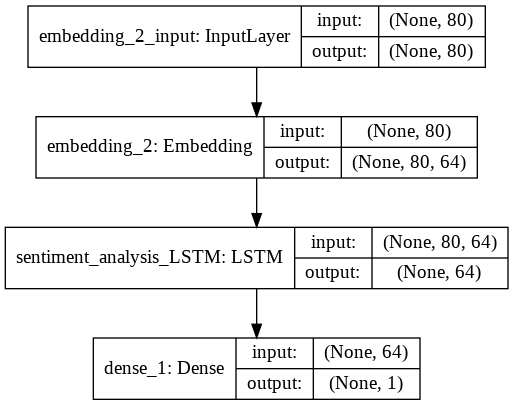

In [ ]:
from keras.layers import LSTM, Dense
from keras.layers.embeddings import Embedding
from keras.models import Sequential

#emb_vec_len = 100
emb_vec_len = 64

model = Sequential()
#model.add(Embedding(input_dim = max_words, output_dim = emb_vec_len, mask_zero=True))
model.add(Embedding(input_dim = max_words, output_dim = emb_vec_len, input_length=max_review_length))
model.add(LSTM(units = 64,name='sentiment_analysis_LSTM'))
#model.add(LSTM(units = 64, batch_input_shape=(max_review_length,embedding_length), return_sequences=False, unroll=True))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#visualize

model.summary()
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='sent_analysis_model.png')

In [ ]:
print('Training....')
batch_size = 32

model.fit(train_x, train_y, batch_size=batch_size, epochs=10,validation_data = (test_x,test_y))

Training....


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 7000 samples, validate on 3000 samples
Epoch 1/10
7000/7000 [==============================] - 17s 2ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 1.5885e-04 - val_accuracy: 1.0000
Epoch 2/10
7000/7000 [==============================] - 17s 2ms/step - loss: 1.1065e-04 - accuracy: 1.0000 - val_loss: 7.8708e-05 - val_accuracy: 1.0000
Epoch 3/10
7000/7000 [==============================] - 17s 2ms/step - loss: 6.2431e-05 - accuracy: 1.0000 - val_loss: 4.9693e-05 - val_accuracy: 1.0000
Epoch 4/10
7000/7000 [==============================] - 17s 2ms/step - loss: 4.1562e-05 - accuracy: 1.0000 - val_loss: 3.4722e-05 - val_accuracy: 1.0000
Epoch 5/10
7000/7000 [==============================] - 17s 2ms/step - loss: 2.9829e-05 - accuracy: 1.0000 - val_loss: 2.5551e-05 - val_accuracy: 1.0000
Epoch 6/10
7000/7000 [==============================] - 20s 3ms/step - loss: 2.2354e-05 - accuracy: 1.0000 - val_loss: 1.9525e-05 - val_accuracy: 1.0000
Epoch 7/10
7000/7000 [================

In [ ]:
score, acc = model.evaluate(test_x,test_y,batch_size=batch_size)
print(f'Test score = {score}')
print(f'Test accuracy = {acc}')

3000/3000 [==============================] - 1s 391us/step
Test score = 8.329255843515664e-06
Test accuracy = 1.0


In [ ]:
review = "it was not a wonderful movie"
print(f'New review = {review}')

#d = K.datasets.imdb.get_word_index()
words = review.split()
review =[]
for word in words:
  word = word.lower()
  if word not in word_index:
    review.append(2)
  else:
    review.append(word_index[word])

print(f"review = {review}")
review = K.preprocessing.sequence.pad_sequences([review],truncating='post',padding='post',maxlen=max_review_length)
#review = K.preprocessing.sequence.pad_sequences([review], truncation='pre',padding='pre',maxlen=80)

prediction = model.predict(review)
print(f'Prediction (0 = Negative, 1 = positive) = {prediction}')

New review = it was not a wonderful movie
review = [10, 27, 18, 5, 1541, 453]
Prediction (0 = Negative, 1 = positive) = [[8.329292e-06]]
